#Support vector Classifier

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# synthetic datapoints
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0)

In [3]:
x

array([[ 1.31881196,  0.23352192],
       [-0.32409318, -0.2642106 ],
       [-0.45281824, -0.70477347],
       ...,
       [ 1.03611717,  1.26733951],
       [ 1.31009237,  1.08168367],
       [-1.05195518, -0.99404916]])

In [7]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [9]:
pd.DataFrame(x)[0]

0      1.318812
1     -0.324093
2     -0.452818
3      1.553545
4     -0.186202
         ...   
995   -1.307969
996    0.242252
997    1.036117
998    1.310092
999   -1.051955
Name: 0, Length: 1000, dtype: float64

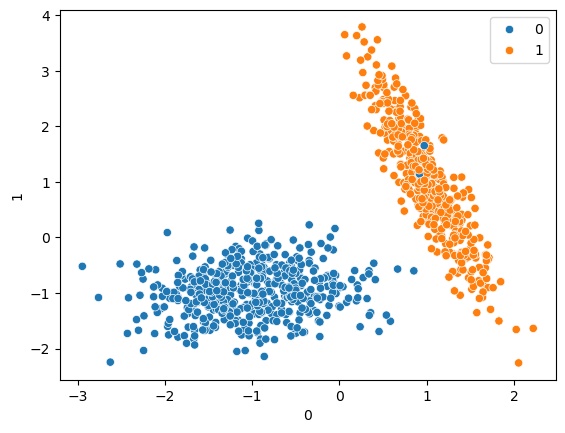

In [11]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [38]:
x_train

array([[ 0.9513833 ,  1.50605409],
       [ 1.13850525,  0.87430855],
       [ 0.67584347,  1.95424891],
       ...,
       [-1.22723822, -0.69511783],
       [-1.64139949, -0.92300568],
       [-1.5461886 , -1.65646839]])

In [42]:
y_test

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

In [30]:
from sklearn.svm import SVC


In [32]:
svc=SVC(kernel='linear')

In [44]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [46]:
y_pred=svc.predict(x_test)

In [48]:
from sklearn .metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[125   0]
 [  0 125]]


In [ ]:
# can use different kernels
# like polynomial,rbf,sigmoid,linear
# svc=SVC(kernel='linear') change it as pe your need


In [54]:
# support vector regression implementation

In [62]:
import seaborn as sns
df=sns.load_dataset('tips')


In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [70]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [72]:
# feature encoding 
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [76]:
# independent features

In [78]:
x=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [101]:
x_train

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2
...,...,...,...,...,...,...
64,2.64,Male,No,Sat,Dinner,3
15,3.92,Male,No,Sun,Dinner,2
228,2.72,Male,No,Sat,Dinner,2
125,4.20,Female,No,Thur,Lunch,6


In [103]:
x_test

,tip,sex,smoker,day,time,size
162,2.00,Female,No,Sun,Dinner,3
60,3.21,Male,Yes,Sat,Dinner,2
61,2.00,Male,Yes,Sat,Dinner,2
63,3.76,Male,Yes,Sat,Dinner,4
69,2.09,Male,Yes,Sat,Dinner,2
...,...,...,...,...,...,...
201,2.01,Female,Yes,Thur,Lunch,2
149,2.00,Male,No,Thur,Lunch,2
175,3.11,Male,Yes,Sun,Dinner,2
226,2.00,Female,Yes,Fri,Lunch,2


In [107]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder() 
le1=LabelEncoder()
le2=LabelEncoder()


In [111]:
x_train['sex']=le.fit_transform(x_train['sex'])
x_train['smoker']=le1.fit_transform(x_train['smoker'])
x_train['time']=le2.fit_transform(x_train['time'])

In [113]:
x_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [115]:
x_test['sex']=le.fit_transform(x_test['sex'])
x_test['smoker']=le1.fit_transform(x_test['smoker'])
x_test['time']=le2.fit_transform(x_test['time'])

In [117]:
x_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [145]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), [3])], remainder='passthrough')


In [147]:
ct.fit_transform(x_train)

array([[1., 0., 0., ..., 1., 0., 2.],
       [0., 1., 0., ..., 0., 0., 3.],
       [0., 1., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 0., 1., ..., 0., 1., 6.],
       [0., 1., 0., ..., 0., 0., 2.]])

In [157]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

x_train=ct.fit_transform(x_train)

In [161]:
# svr
from sklearn.svm import SVR
svr=SVR()


In [163]:
# svr.fit(x_train,y_train)
x_train

array([[ 1.  ,  0.  ,  0.  ,  1.76,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  1.66,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 0.  ,  1.  ,  0.  ,  3.5 ,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  ,  2.01,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  4.  ,  0.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  5.2 ,  0.  ,  0.  ,  0.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  4.  ,  1.  ,  1.  ,  1.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  5.  ,  1.  ,  0.  ,  1.  ,  5.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.75,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  3.12,  1.  ,  0.  ,  0.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  3.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  5.  ,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 0.  ,  0.  ,  1.  ,  4.  ,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.

In [165]:
x_test=ct.transform(x_test)

In [167]:
x_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

In [169]:
svr.fit(x_train,y_train)

SVR()

In [171]:
y_pred=svr.predict(x_test)

In [173]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4602811456115927
4.1486423210190235


In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100,1000],          # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001,0.0001],  # Kernel coefficient
    'kernel': [ 'rbf']  # Different kernels
}

In [187]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [189]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [191]:
grid_prediction=grid.predict(x_test)

In [193]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5081618245078687
3.8685147526100234
